In [1]:
import gym
import torch
import pandas as pd
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2"   

from elegantrl.run import *
from neo_finrl.ccxt.data_fetch_ccxt import ccxt_fetch_data
from neo_finrl.ccxt.preprocess_ccxt import preprocess_btc

from neo_finrl.ccxt.env_btc_ccxt import BitcoinEnv
from elegantrl.agent import *

In [2]:
# url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Deep Learning/LSTM_stock_price_predictor-master/btc_create.csv'
# regression feature
url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Feature-Selection-for-Machine-Learning-master/Data/merge_augmento_btc.csv'
# url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Deep Learning/LSTM_stock_price_predictor-master/code/Data/FUTURES/DOGEUSDT/DOGEUSDT-1m-data.csv'

In [3]:
# url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Deep Learning/LSTM_stock_price_predictor-master/doge_temp.csv'
# df = pd.read_csv(url, parse_dates=True).fillna(value=0)
# df =  df.drop(['Unnamed: 0'], axis=1)


df = pd.read_csv(url, parse_dates=True).fillna(value=0)
df = df[['time', 'open', 'high', 'low', 'close', 'reddit_selling',
       'reddit_institutional_money', 'reddit_prediction', 'reddit_adoption',
       'reddit_portfolio', 'reddit_investing_trading',
       'reddit_euphoric_excited', 'reddit_risk', 'reddit_bullish',
       'reddit_bots', 'reddit_due_diligence', 'reddit_dip',
       'reddit_advice_support', 'reddit_good_news', 'reddit_learning',
       'reddit_marketcap', 'reddit_positive', 'reddit_tax',
       'reddit_long_term_investing', 'reddit_competition', 'reddit_buying',
       'reddit_price', 'reddit_optimistic', 'reddit_negative']]

In [4]:
# '''data_fetch'''
# df = ccxt_fetch_data(start = '20200602 00:00:00', end = '20210609 00:00:00',
#                     pair = 'DOGE/USDT', period = '1m')
# df = ccxt_fetch_data(start = '20210101 00:00:00', end = '20210107 00:00:00',
#                     pair = 'BTC/USDT', period = '1m')

In [5]:
# df = df[362360:]
df

,time,open,high,low,close,reddit_selling,reddit_institutional_money,reddit_prediction,reddit_adoption,reddit_portfolio,...,reddit_learning,reddit_marketcap,reddit_positive,reddit_tax,reddit_long_term_investing,reddit_competition,reddit_buying,reddit_price,reddit_optimistic,reddit_negative
0,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,3.0,0.0,7.0,9.0,2.0,...,3.0,1.0,13.0,0.0,1.0,9.0,9.0,17.0,7.0,31.0
1,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,3.0,0.0,5.0,12.0,2.0,...,5.0,1.0,17.0,0.0,2.0,12.0,13.0,24.0,7.0,35.0
2,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,2.0,0.0,8.0,5.0,2.0,...,1.0,3.0,15.0,0.0,4.0,15.0,10.0,24.0,9.0,36.0
3,2017-08-17 09:00:00,4360.00,4445.78,4360.00,4444.00,5.0,1.0,14.0,13.0,3.0,...,2.0,2.0,27.0,0.0,11.0,9.0,6.0,39.0,9.0,37.0
4,2017-08-17 10:00:00,4441.10,4470.00,4399.81,4460.00,5.0,0.0,12.0,10.0,0.0,...,1.0,0.0,16.0,0.0,6.0,7.0,8.0,32.0,5.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32051,2021-04-20 12:00:00,56266.83,56290.31,55604.73,55801.14,17.0,2.0,35.0,39.0,8.0,...,9.0,5.0,62.0,3.0,29.0,38.0,30.0,77.0,26.0,100.0
32052,2021-04-20 13:00:00,55801.13,56320.55,55693.69,56317.99,15.0,5.0,39.0,52.0,3.0,...,16.0,5.0,67.0,5.0,23.0,32.0,21.0,81.0,22.0,93.0
32053,2021-04-20 14:00:00,56318.00,56455.93,55200.00,55336.14,17.0,2.0,39.0,40.0,11.0,...,12.0,10.0,73.0,5.0,12.0,45.0,30.0,99.0,29.0,113.0
32054,2021-04-20 15:00:00,55336.14,55567.87,54649.58,55323.19,15.0,9.0,41.0,35.0,10.0,...,14.0,7.0,62.0,6.0,25.0,49.0,26.0,105.0,27.0,121.0


In [6]:
dff = df.set_index('time')
data_ary = preprocess_btc(dff)

                        open     high      low    close  reddit_selling  \
time                                                                      
2017-08-17 06:00:00  4330.29  4345.45  4309.37  4324.35             3.0   
2017-08-17 07:00:00  4316.62  4349.99  4287.41  4349.99             3.0   
2017-08-17 08:00:00  4333.32  4377.85  4333.32  4360.69             2.0   
2017-08-17 09:00:00  4360.00  4445.78  4360.00  4444.00             5.0   
2017-08-17 10:00:00  4441.10  4470.00  4399.81  4460.00             5.0   

                     reddit_institutional_money  reddit_prediction  \
time                                                                 
2017-08-17 06:00:00                         0.0                7.0   
2017-08-17 07:00:00                         0.0                5.0   
2017-08-17 08:00:00                         0.0                8.0   
2017-08-17 09:00:00                         1.0               14.0   
2017-08-17 10:00:00                         0.0       

In [7]:
# data_ary = preprocess_btc(df)

In [8]:
data_ary.shape

(32056, 28)

In [9]:
gpu_id = 2
args = Arguments(agent=None, env=None, gpu_id=gpu_id)
args.agent = AgentDoubleDQN()

In [10]:
'''choose environment'''
args.env = BitcoinEnv(processed_ary = data_ary, if_train=True, if_test=False)
args.env_eval = BitcoinEnv(processed_ary = data_ary, if_train=False, if_test=False)
args.net_dim = 2 ** 9 # change a default hyper-parameters
args.batch_size = 2 ** 8

In [11]:
train_and_evaluate(args)

| GPU id: 2, cwd: ./AgentDoubleDQN/BitcoinEnv_2
| Remove history
ID      Step      MaxR |    avgR      stdR       objA      objC |  avgS  stdS
2   1.02e+03      0.37 |
2   1.02e+03      0.37 |    0.37      0.00       0.16      0.00 |  4808     0
2   2.05e+03      0.37 |    0.15      0.00       0.27      0.00 |  4808     0
2   7.17e+03      3.75 |
2   7.17e+03      3.75 |    3.75      0.00       0.25      0.00 |  4808     0
2   8.19e+03      3.75 |    0.08      0.00       0.23      0.00 |  4808     0
2   1.33e+04      3.75 |    0.16      0.00       0.17      0.00 |  4808     0
2   1.84e+04      3.75 |    1.58      0.00       0.15      0.00 |  4808     0
2   2.36e+04      3.75 |    1.54      0.00       0.12      0.00 |  4808     0
2   2.87e+04      3.75 |    1.00      0.00       0.11      0.00 |  4808     0
2   3.38e+04      3.75 |    1.03      0.00       0.09      0.00 |  4808     0
2   3.89e+04      3.75 |    2.32      0.00       0.07      0.00 |  4808     0
2   4.40e+04      3.90 |
2 

2   5.09e+05      3.90 |   -1.87      0.00       0.00      0.00 |  4808     0
2   5.14e+05      3.90 |   -2.13      0.00       0.00      0.00 |  4808     0
2   5.19e+05      3.90 |   -1.14      0.00       0.00      0.00 |  4808     0
2   5.24e+05      3.90 |    0.27      0.00       0.00      0.00 |  4808     0
2   5.29e+05      3.90 |   -0.75      0.00       0.00      0.00 |  4808     0
2   5.35e+05      3.90 |    0.23      0.00       0.00      0.00 |  4808     0
2   5.40e+05      3.90 |   -0.35      0.00       0.00      0.00 |  4808     0
2   5.45e+05      3.90 |   -0.27      0.00       0.00      0.00 |  4808     0
2   5.50e+05      3.90 |   -2.05      0.00       0.00      0.00 |  4808     0
2   5.55e+05      3.90 |   -0.98      0.00       0.00      0.00 |  4808     0
2   5.60e+05      3.90 |    0.95      0.00       0.00      0.00 |  4808     0
2   5.65e+05      3.90 |   -1.96      0.00       0.00      0.00 |  4808     0
2   5.70e+05      3.90 |   -0.23      0.00       0.00      0.00 

| SavedDir: ./AgentDoubleDQN/BitcoinEnv_2
| UsedTime: 7065


In [12]:
args = Arguments(agent=None, env=None, gpu_id=gpu_id)
args.agent = AgentDoubleDQN()
args.env = BitcoinEnv(processed_ary = data_ary, if_train=False, if_test=True)
args.net_dim = 2 ** 9 # change a default hyper-parameters
args.batch_size = 2 ** 8
args.if_remove = False
args.cwd = './AgentDoubleDQN/BitcoinEnv_'+str(gpu_id)
args.init_before_training()

| GPU id: 2, cwd: ./AgentDoubleDQN/BitcoinEnv_2


In [13]:
prediction = args.env.trade_prediction(args, torch, df)

Loaded act: ./AgentDoubleDQN/BitcoinEnv_2


ValueError: arrays must all be same length

In [ ]:
args.env.backtest_plot(prediction, df)

Loaded act: ./AgentDoubleDQN/BitcoinEnv_2


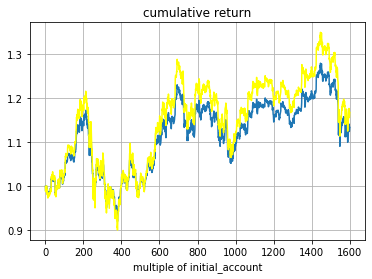

[1.0,
 0.9901431981148561,
 0.9930183367163808,
 0.9958182916453696,
 0.9993765500100431,
 0.999200119862762,
 1.0004623041411442,
 1.0001830598317676,
 0.9975119165467767,
 0.985262334188485,
 0.9925232087947261,
 0.9887708184797679,
 0.9804706978005021,
 0.9784645152335121,
 0.9833240847400335,
 0.9848561725239929,
 0.9844459610005113,
 0.9866049930842126,
 0.9876230100576943,
 0.9829132200134887,
 0.9818565987389914,
 0.9831625476225858,
 0.984231253153746,
 0.9875215023017244,
 0.9863184982208383,
 0.9879039526950343,
 0.9952754799001253,
 0.9932138403930978,
 0.9916694070712497,
 0.9898022261160382,
 0.9945519268673851,
 1.0175936649100947,
 1.014518646171332,
 1.014182377234567,
 1.0139314166178126,
 1.021024156755671,
 1.019182777321443,
 1.019700310108154,
 1.0260830838369803,
 1.0147584370157112,
 1.01472081251929,
 1.011105529527228,
 1.0188905995914215,
 1.0124100413640842,
 1.0144300065157008,
 1.013650800582004,
 1.0175990211752104,
 1.015812445477957,
 1.0189943282378051,

<Figure size 432x288 with 0 Axes>

In [14]:
# Draw the graph
import matplotlib.pyplot as plt
%matplotlib inline

BitcoinEnv(processed_ary = data_ary, if_train=False, if_test=True)\
.draw_cumulative_return(self = args.env, args = args, _torch = torch)